# Ford GoBike Data exploration
## by Shreyas Raghavan 

## Preliminary Wrangling

> Our analysis uses the data pertaining to trips on Ford GoBike for the month of August 2018. Our major aim is to understand the following. 
1. When are most trips taken in terms of time of day of the week
3. Does the above depend on if a user is a subscriber or customer?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

..

In [2]:
df = pd.read_csv("C:Desktop/201808-fordgobike-tripdata.csv")

In [3]:
df.shape

(192162, 16)

### What is the structure of your dataset?

Our data contains **192162 records for 16 columns**. We can have a glimpse of the dataset below , 

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,69465,2018-08-31 19:18:08.6130,2018-09-01 14:35:54.0640,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,813,Customer,NaN,NaN,No
1,60644,2018-08-31 21:40:01.7490,2018-09-01 14:30:46.4470,50.0,2nd St at Townsend St,37.780526,-122.390288,50.0,2nd St at Townsend St,37.780526,-122.390288,1964,Subscriber,1990.0,Male,No
2,57922,2018-08-31 20:04:28.1630,2018-09-01 12:09:50.8240,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,535,Customer,1997.0,Male,No
3,82573,2018-08-31 13:07:14.9020,2018-09-01 12:03:28.2600,19.0,Post St at Kearny St,37.788975,-122.403452,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,3080,Customer,2000.0,Female,No
4,57677,2018-08-31 19:48:45.1980,2018-09-01 11:50:03.1560,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,132,Customer,NaN,NaN,No


### What is/are the main feature(s) of interest in your dataset?

Our basic aim is to find when has the most number of trips been taken , whether an average time for subscriber differs from customer , if so then what would this difference mean to us ? Hence , Duration and user_type seems to be a good start but thinking from a sales perspective we must also evaluate which station is more profitable for us. Also , from other sales persepctive we may also want to see about the type of customer on the basis of age/gender to target more customers use our service. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

As previously mentioned , Our main feature would be 
1. Station start 
2. Duration 
3. Station end 
4. User_type 

From sales perspective , 
1. Member_gender 
2. Member_birth_year

## Univariate Exploration

Before we further proceed into the Univariate analysis , Let us look at the statistical summary of the data and also our data depth

In [5]:
df.describe(include = 'all')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
count,192162.000000,192162,192162,189250.000000,189250,192162.000000,192162.000000,189250.000000,189250,192162.000000,192162.000000,192162.000000,192162,181247.000000,181287,192162
unique,NaN,192141,192148,NaN,306,NaN,NaN,NaN,306,NaN,NaN,NaN,2,NaN,3,2
top,NaN,2018-08-07 18:25:25.2660,2018-08-24 16:42:35.3170,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,NaN,Male,No
freq,NaN,2,2,NaN,3937,NaN,NaN,NaN,5423,NaN,NaN,NaN,161443,NaN,131064,176772
mean,871.052700,NaN,NaN,123.507672,NaN,37.766253,-122.343527,122.601020,NaN,37.766362,-122.343112,2181.434378,NaN,1983.623001,NaN,NaN
std,2413.884799,NaN,NaN,102.127505,NaN,0.112896,0.239326,102.802511,NaN,0.112819,0.239081,1204.464636,NaN,10.313485,NaN,NaN
min,61.000000,NaN,NaN,3.000000,NaN,37.312854,-122.473658,3.000000,NaN,37.312854,-122.473658,11.000000,NaN,1888.000000,NaN,NaN
25%,355.000000,NaN,NaN,36.000000,NaN,37.770407,-122.409449,30.000000,NaN,37.771058,-122.408445,1176.000000,NaN,1978.000000,NaN,NaN
50%,564.000000,NaN,NaN,91.000000,NaN,37.781074,-122.395526,90.000000,NaN,37.781270,-122.395526,2231.000000,NaN,1986.000000,NaN,NaN
75%,887.000000,NaN,NaN,195.000000,NaN,37.797673,-122.274894,195.000000,NaN,37.798014,-122.278175,3169.000000,NaN,1991.000000,NaN,NaN


As we can see above , There are few interesting things which can be seen. 

1. Start station of San Francisco Caltrain Station seem to be on top with 3937 occurance , Similarly for the end stop with 5423. We can establish that Caltrain station is one of the profitable station for GoBike. 
2. Minimum duration is of one minute (61 seconds) and the maximum is of 85967 seconds which calculates to 1431 minutes which is equivalent to somewhere around 23 hours! 
3. Our of 192162 records , We can note that 161433 user types are subscribers. Which basically means that more of our riders are subscribers. 
4. We can also see that our of the 181247 records for gender of customers , 131064 customers are Males. But we may look deep into it and analyse whether the average duration for the individual customer type differs. 

Before further moving on , We must evaluate the coverage of our data. This would enable us to understand how healthy our data is. 

In [6]:
pd.DataFrame(((df.count()-df.isnull().sum())/df.count())*100 , columns=['Coverage'])

,Coverage
duration_sec,100.000000
start_time,100.000000
end_time,100.000000
start_station_id,98.461295
start_station_name,98.461295
start_station_latitude,100.000000
start_station_longitude,100.000000
end_station_id,98.461295
end_station_name,98.461295
end_station_latitude,100.000000


As we can see , Our data is healthy and good to go! 

Let's take a look at it graphically , for a better understanding. 

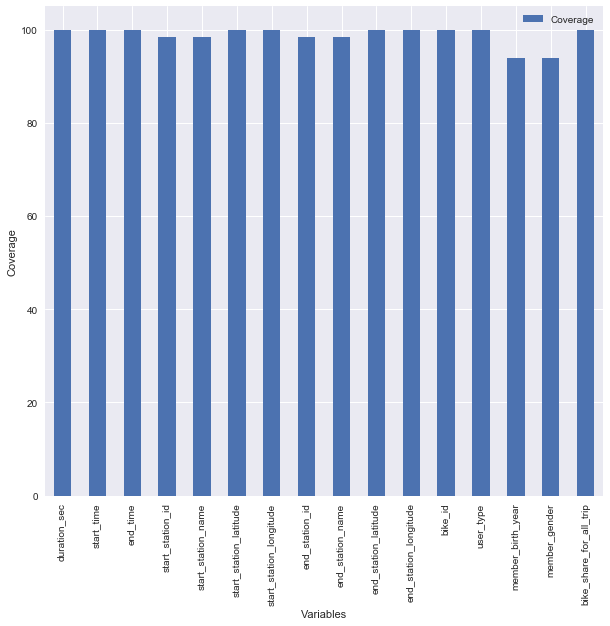

In [7]:
ax = pd.DataFrame(((df.count()-df.isnull().sum())/df.count())*100 , columns=['Coverage']).plot(kind = 'bar' , figsize = (10,9))
ax.set(xlabel = 'Variables' , ylabel = 'Coverage')

As we can see from the above plot , Our variables are pretty good. This can also help us during modelling and during the feature selections (If we proceed further with it)

##### Duration in Seconds 

Duration of the trip can be a key element. This would help us identify users and would also help us judge the time they take for the travel.

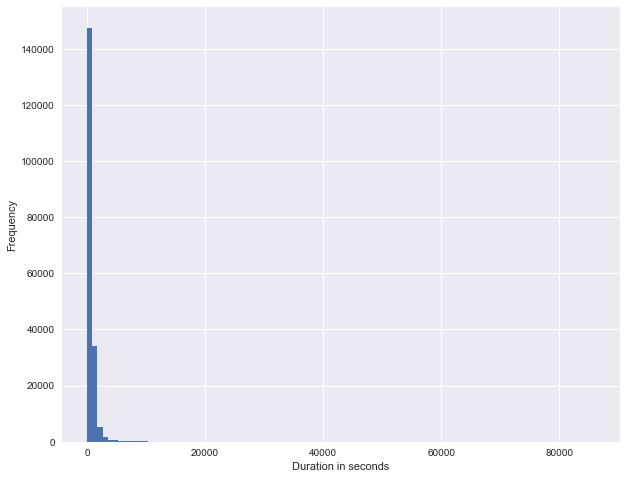

In [8]:
df['duration_sec'].plot.hist(bins = 100 , figsize = (10 , 8)).set(xlabel = 'Duration in seconds')

In [9]:
df['duration_sec'].describe().to_frame()

,duration_sec
count,192162.000000
mean,871.052700
std,2413.884799
min,61.000000
25%,355.000000
50%,564.000000
75%,887.000000
max,85967.000000


From the above plot , We can see that the users have taken more trips below 10000 seconds. Roughly , We can also infer that there are outliers to the pertaining data. We did note the very same on the description above too! Let's take use of our boxplots

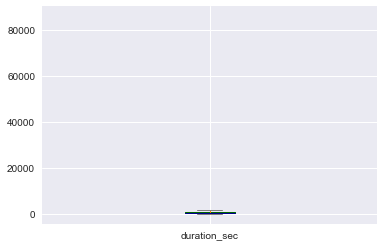

In [10]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df['duration_sec'].plot.box(color = color , sym = 'r+')

From the above plot , we can see that the concentration of rides are towards the lower end. I still firmly believe that the presence of outlier is hampering our cause. We can fix it by either limiting the y ticks or by using logarthimic transformation to our data

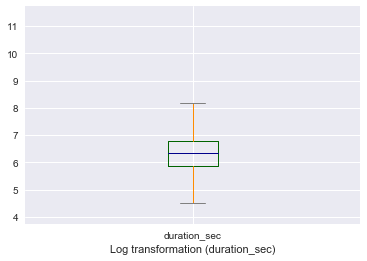

In [11]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
np.log(df['duration_sec']).plot.box(color = color , sym = 'r+').set(xlabel = 'Log transformation (duration_sec)')

We used log transformation above and can see a good plot for the duration. Though this is a very good technique for handling outliers but , we must also figure out how many variables are particularly present above 10,000 , 20,000 , 30,000 and so on. For this , We can see the below text

In [12]:
print("Length of duration below 5000 :-  " +
      str(df.query('duration_sec < 5000').shape[0]))
print("Length of duration above 10000 and below 200000 :-  " +
      str(df.query('duration_sec > 10000 and duration_sec < 20000').shape[0]))
print("Length of duration above 20000 and below 300000 :-  " +
      str(df.query('duration_sec > 20000 and duration_sec < 30000').shape[0]))
print("Length of duration above 30000 and below 400000 :-  " +
      str(df.query('duration_sec > 30000 and duration_sec < 40000').shape[0]))
print("Length of duration above 40000 and below 500000 :-  " +
      str(df.query('duration_sec > 40000 and duration_sec < 50000').shape[0]))
print("Length of duration above 50000  :-  " +
      str(df.query('duration_sec > 50000').shape[0])) 

print('total sample length :- ' + str(df.shape[0]))

Length of duration below 5000 :-  190038
Length of duration above 10000 and below 200000 :-  560
Length of duration above 20000 and below 300000 :-  142
Length of duration above 30000 and below 400000 :-  60
Length of duration above 40000 and below 500000 :-  59
Length of duration above 50000  :-  154
total sample length :- 192162


As we can see that from our total record of 192162 nearly 2124 records are above 5000. Which corresponds to 1.1% of our data. These are outliers for our set. We can ignore them in case we are considering to model our data. Let's now take a look at the plots which are below the 20000 range

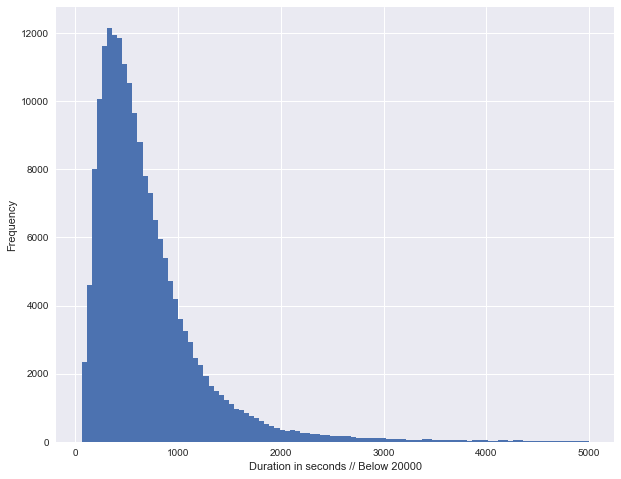

In [13]:
df.query('duration_sec < 5000')['duration_sec'].plot.hist(bins = 100 , figsize = (10 , 8)).set(xlabel = 'Duration in seconds // Below 20000')

In [14]:
df.query('duration_sec < 5000')['duration_sec'].describe().to_frame()

,duration_sec
count,190038.000000
mean,702.822620
std,555.655526
min,61.000000
25%,352.000000
50%,559.000000
75%,872.000000
max,4999.000000


As we can see that the distribution is not normal. The plot is right skewed and shows postivie skewness. 

##### Start_time and end_time

Before , We go ahead. We must ensure that start time and end time are converted to datetime. This would help us get to the insights much more easily. After the sanity check is completed. We can go ahead with our plots and try to analyse the dates and time(hour) where the rides have been taken. 

In [15]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df[['start_time','end_time']].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

Let's look at one more sanity check for our data and figure out if the following data is for august or not. We must ensure that the month of august is selected for a uniform analysis. 

In [16]:
print(df['start_time'].dt.month.value_counts())
print(df['end_time'].dt.month.value_counts())

8    192162
Name: start_time, dtype: int64
8    192131
9        31
Name: end_time, dtype: int64


As we can see that september is included on 31 of our records. We are going to drop it as we just want to check for the month of August

In [17]:
df = df[df['end_time'].dt.month == 8]

In [18]:
df.shape

(192131, 16)

After the removal , We can see that 31 records have been removed. We may now proceed with our analysis

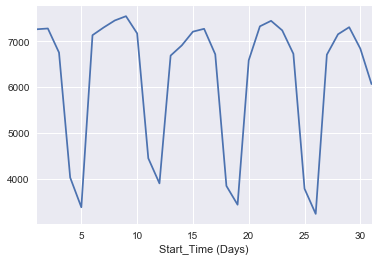

In [35]:
a = df.start_time.dt.day.value_counts().sort_index().plot(kind = 'line').set(xlabel = 'Start_Time (Days)')

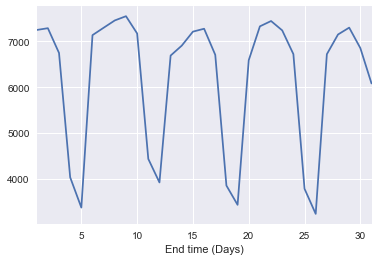

In [34]:
b = df.end_time.dt.day.value_counts().sort_index().plot(kind = 'line').set(xlabel = 'End time (Days)')

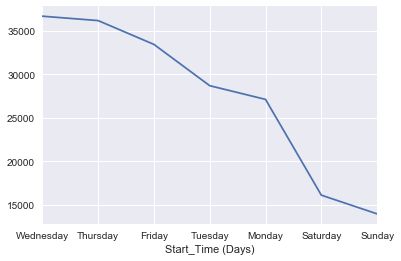

In [41]:
dayofweek = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
a = df.start_time.dt.dayofweek.map(dayofweek).value_counts().plot(kind = 'line').set(xlabel = 'Start_Time (Days)')

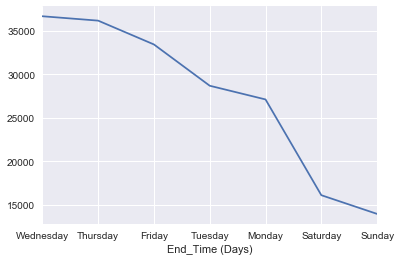

In [42]:
a = df.start_time.dt.dayofweek.map(dayofweek).value_counts().plot(kind = 'line').set(xlabel = 'End_Time (Days)')

In [119]:
df['weekday_start'] = df.start_time.dt.dayofweek.map(dayofweek)
df['weekday_end'] = df.end_time.dt.dayofweek.map(dayofweek)

As we can see that the maximum number of rides are taken on Wednesday. Unsurprisingly Sunday seems to be a bit dull for Gobikes 

###### start_station_name and end station name

Let's take a look at the exploration of the stations through which the journey has begun for most of them! We would take a look at the top 20 bases. 

In [49]:
len(df['start_station_name'].value_counts())

306

Out of our 306 stations. We would just want to explore the 20 bases and they are plotted below

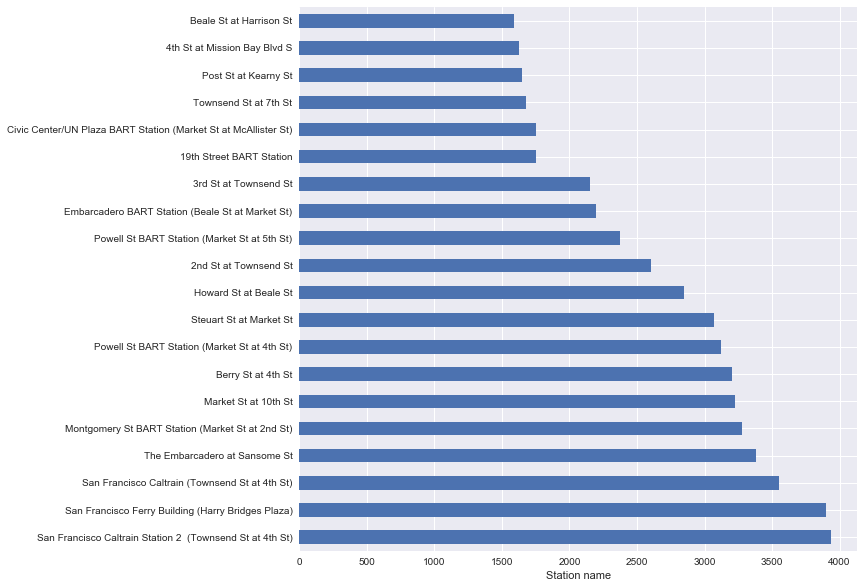

In [47]:
df['start_station_name'].value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' , figsize = (10,10)).set(xlabel = 'Station name')

Let's take a look at the exploration of the stations through which the journey has ended for most of them! We would take a look at the top 20 bases. 

In [50]:
len(df['end_station_name'].value_counts())

306

Out of our 306 stations. We would just want to explore the 20 bases and they are plotted below

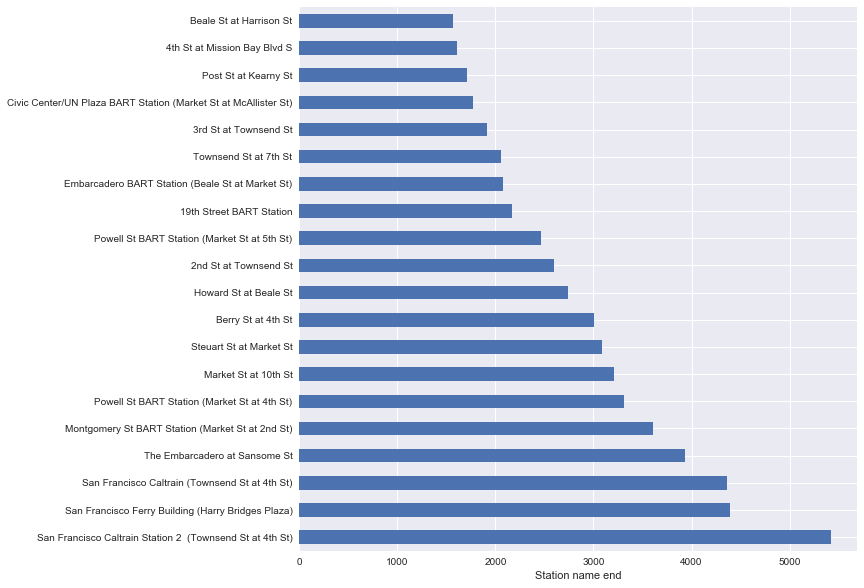

In [51]:
df['end_station_name'].value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' , figsize = (10,10)).set(xlabel = 'Station name end')

**California Station 2 (Townsend St at 4th St) Seems to be the most popular among all** It's the highest for the start as well as end station.

**Before we move to the next plot , We have ignored the following variables (Start_station_id , end_station_latitude , end_station_longitude , start_station_latitude , start_station_longitude , end_station_id) Since they point towards the station name. We may look at the coordinates in the Bivariate section** 

##### Know your user 

About 16k users are Subscribers. We can also look at the Gender and year of birth

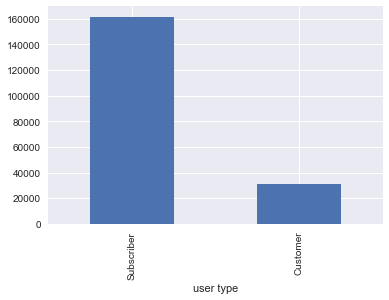

In [57]:
print(df.user_type.value_counts().plot(kind = 'bar').set(xlabel = 'user type'))

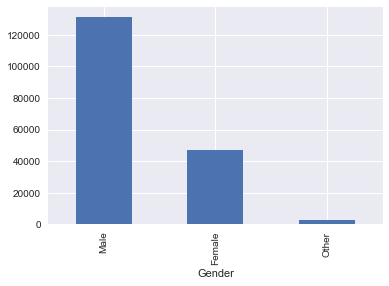

In [58]:
print(df.member_gender.value_counts().plot(kind = 'bar').set(xlabel = 'Gender'))

Most of our users are Male. 

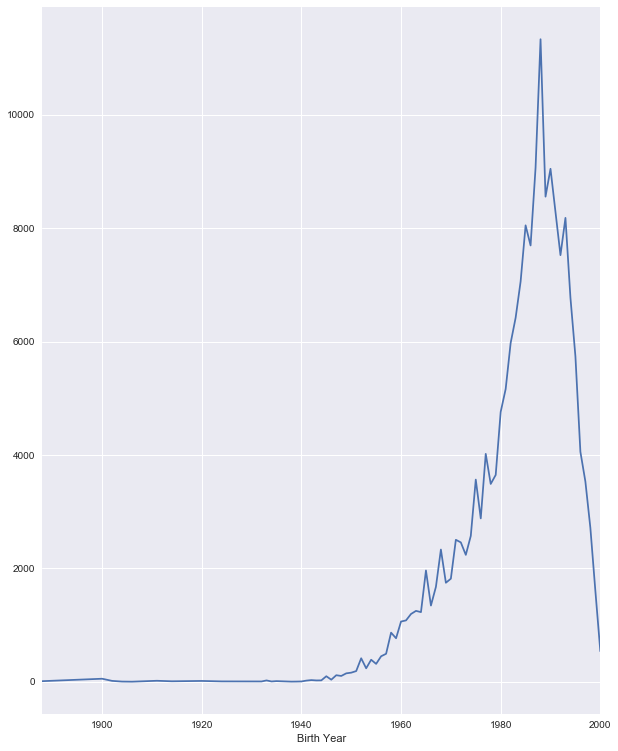

In [62]:
print(df.member_birth_year.value_counts().sort_index().plot(kind = 'line' , figsize = (10,13)).set(xlabel = 'Birth Year'))

Most of our users belong to the late 80's and 90's generation. 

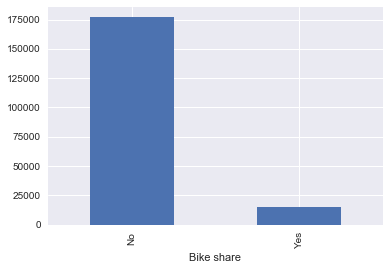

In [170]:
df['bike_share_for_all_trip'].value_counts().plot(kind = 'bar').set(xlabel = 'Bike share')

As we can see most of the people are Non Bike sharers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We could notice that many of our variables are skewed. We had the duration time which had a lot of unusual points. We did perform logarthimic transformation to show normality in our data. What was more impressive was that 1.1% of our data was above 5000 seconds. Going by that , We filtered it to below 5000 seconds and could see a perfect plot. Though , Going forward for the sake of normality. We are going to remove the outliers from the data for a better inference. Also , The data generated was for the month of august. We did see that end time of september was also recorded which was then removed. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The tidy operation was done for end time since the month span came to September which should not be the case since the data is of August. We also noted that many members had year in the early 1900s which was pretty unusual. Though we did remove the september mystery but at the moment , the birth year still remains. 
> We transformed our end time and start time to day's to check if any particular day had more people and we did observe that Wednesday was the jackpot day for GoBikes

## Bivariate Exploration

Let's take a look at this very interesting section. We can actually check the correlation. 

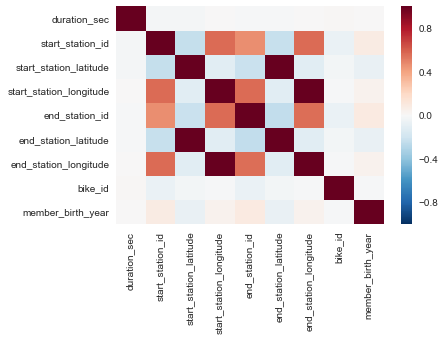

In [63]:
sb.heatmap(df.corr())

We can see that there is a correlation between the Longitude , Latitude level which won't help us during our modelling. Let's look at these plots individually. 

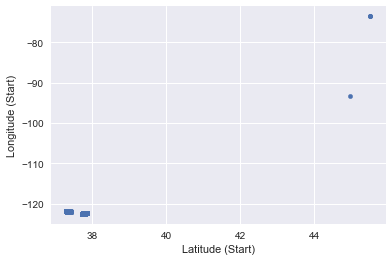

In [171]:
df.plot(kind = 'scatter' , x= 'start_station_latitude' ,
        y= 'start_station_longitude').set(xlabel = 'Latitude (Start)' , ylabel = 'Longitude (Start)')

As we can see that the plots are on similar lines. For start and end. 

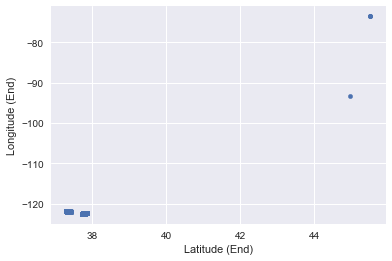

In [172]:
df.plot(kind = 'scatter' , x= 'end_station_latitude' ,
        y= 'end_station_longitude').set(xlabel = 'Latitude (End)' , ylabel = 'Longitude (End)')

We are going to now see what has been the duration of travel for user types and genders

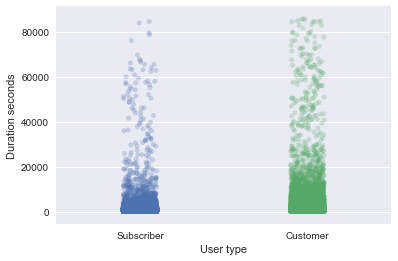

In [168]:
g = sb.stripplot(x=df["user_type"] , y=df['duration_sec'] , jitter=True , alpha = 0.25)
g.set_xlabel('User type')
g.set_ylabel('Duration seconds')

**Looks like , Customers do tend to take a longer trip than the regular subscribers. It is pretty soon to establish whether the subscribers are regular and hence use for a smaller distance as compared to Customer who maybe recreational users hence the longer duration** 

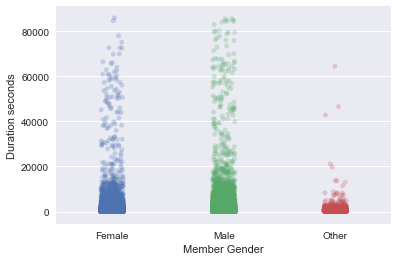

In [167]:
g = sb.stripplot(x=df["member_gender"] , y=df['duration_sec'] , jitter=True ,alpha = 0.25)
g.set_xlabel('Member Gender')
g.set_ylabel('Duration seconds')

There's not much to make difference per say. Male and Female's are renting the bikes for a similar duration

In [76]:
pd.crosstab(df["user_type"] , df['member_gender'])

member_gender,Female,Male,Other
user_type,,,
Customer,7279,15811,455
Subscriber,39991,115231,2491


We can see that most of the subscribers are Males. A significant amount of increase as compared to other genders , meanwhile for Customers there is not a significant difference. 

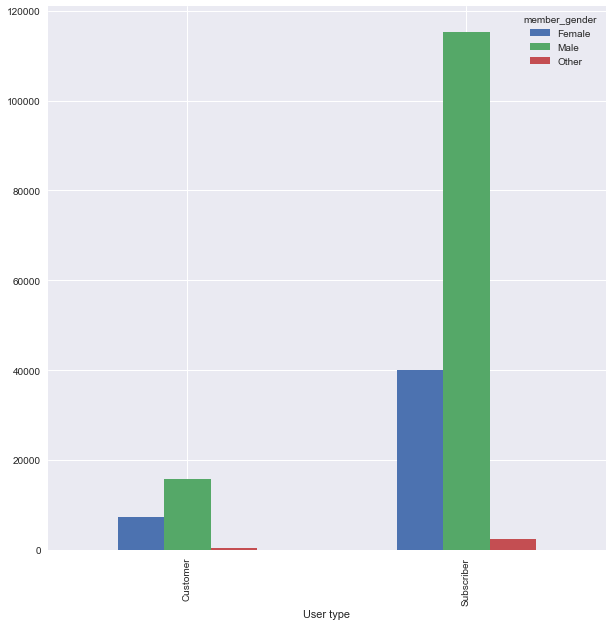

In [75]:
pd.crosstab(df["user_type"] , df['member_gender']).plot(kind = 'bar' , figsize = (10,10)).set(xlabel = 'User type')

As we can see graphically above. One more interesting observation could be to check for year of members as compared to the duration to see if there is a trend

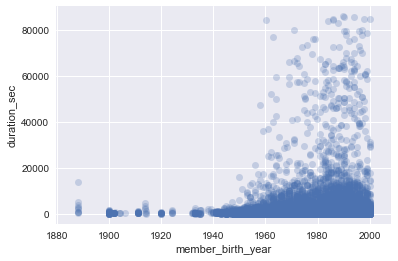

In [165]:
g = sb.regplot(x='member_birth_year',
            y='duration_sec',
            data=df,
            fit_reg=False,  # do not fit a regression line
            x_jitter=0.1,  # could also dynamically set this with range of data
            y_jitter=0.1,
            scatter_kws={'alpha': 0.25 })

Scatter plot , Proves that people between 80s and 00s tend to take the trip for a longer duration

In [96]:
pd.crosstab(df['member_birth_year'] , df['member_gender'])

member_gender,Female,Male,Other
member_birth_year,,,
1888.0,0,0,10
1900.0,4,45,4
1902.0,15,0,0
1904.0,0,0,3
1906.0,0,1,0
1911.0,0,0,17
1914.0,0,8,0
1920.0,0,14,0
1924.0,0,6,0


Let's take a look for users above the birth year of 1970s in terms of gender. 

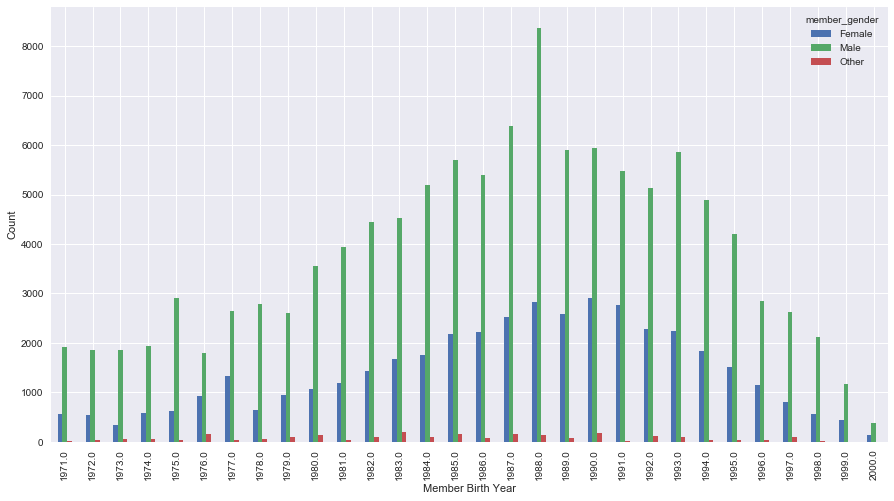

In [161]:
pd.crosstab(df.query('member_birth_year > 1970')['member_birth_year'] ,
            df.query('member_birth_year > 1970')['member_gender']).plot(kind = 'bar' , figsize = (15 ,8)) 
plt.xlabel('Member Birth Year')
plt.ylabel('Count')

Now for User types

In [98]:
pd.crosstab(df['member_birth_year'] , df['user_type'])

user_type,Customer,Subscriber
member_birth_year,,
1888.0,0,10
1900.0,8,45
1902.0,0,15
1904.0,3,0
1906.0,1,0
1911.0,0,17
1914.0,0,8
1920.0,0,14
1924.0,6,0


Here's a representation for people born after 1970s for individual user types

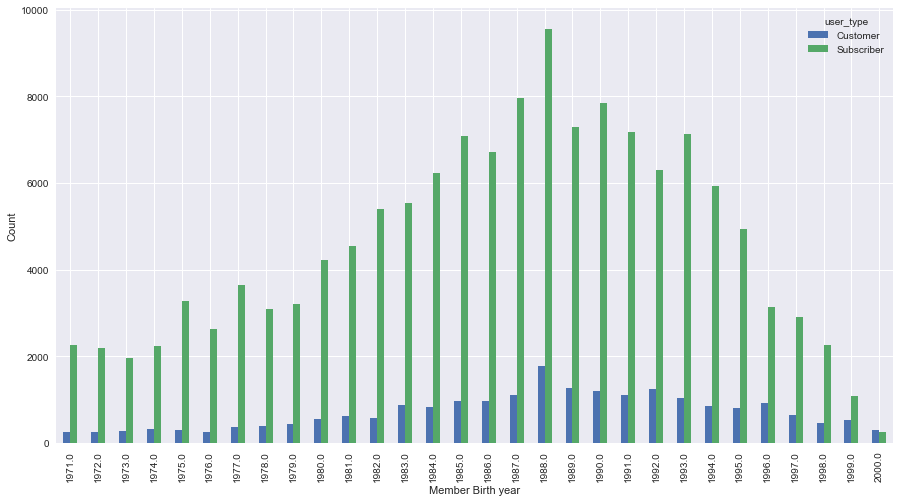

In [160]:
pd.crosstab(df.query('member_birth_year > 1970')['member_birth_year'] ,
            df.query('member_birth_year > 1970')['user_type']).plot(kind = 'bar' , figsize = (15 ,8))
plt.xlabel('Member Birth year')
plt.ylabel('Count')

In [125]:
pd.crosstab(df['bike_share_for_all_trip'] , df['member_gender'])

member_gender,Female,Male,Other
bike_share_for_all_trip,,,
No,43246,119990,2638
Yes,4024,11052,308


We can also see bike share vs user type. We do know that Bike share is only available for Subscribers

In [128]:
pd.crosstab(df['bike_share_for_all_trip'] , df['user_type'])

user_type,Customer,Subscriber
bike_share_for_all_trip,,
No,30705,146042
Yes,0,15384


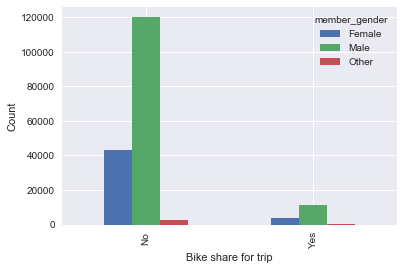

In [158]:
pd.crosstab(df['bike_share_for_all_trip'] , df['member_gender']).plot(kind = 'bar')
plt.xlabel('Bike share for trip')
plt.ylabel('Count')

**Bike sharers are pretty low , There is no conclusive difference out here!**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> My main interest was to check for user demographics. This would help us identify our target customers. Features such as user type , gender and birth year was our primary interest. We did observe a striking difference in terms of subscribers. But we would take it to another level at the Multivariate section

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 1988 seems to be a very interesting year in terms of subscribers. Most of our subscriber are pretty much in their 30s.I believed that Longitude and Latitude may differ but after plotting it was similar hence I felt that I mustn't focus on it. 

## Multivariate Exploration

In this section , We would focus more on the aspect of User demographic. Check some psychological or habitual conditions

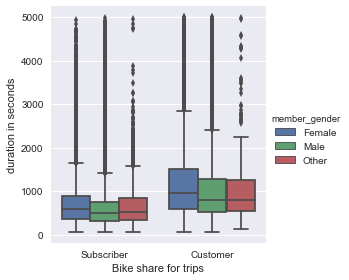

In [157]:
g = sb.factorplot(x="user_type", y="duration_sec", hue="member_gender", kind="box",
                  data=df.query('duration_sec < 5000'))
g.set_xlabels('Bike share for trips')
g.set_ylabels('duration in seconds')

**One of the interesting plot could be to see behavorial aspect in terms of the day of the week. We would be able to check a certain trend** 

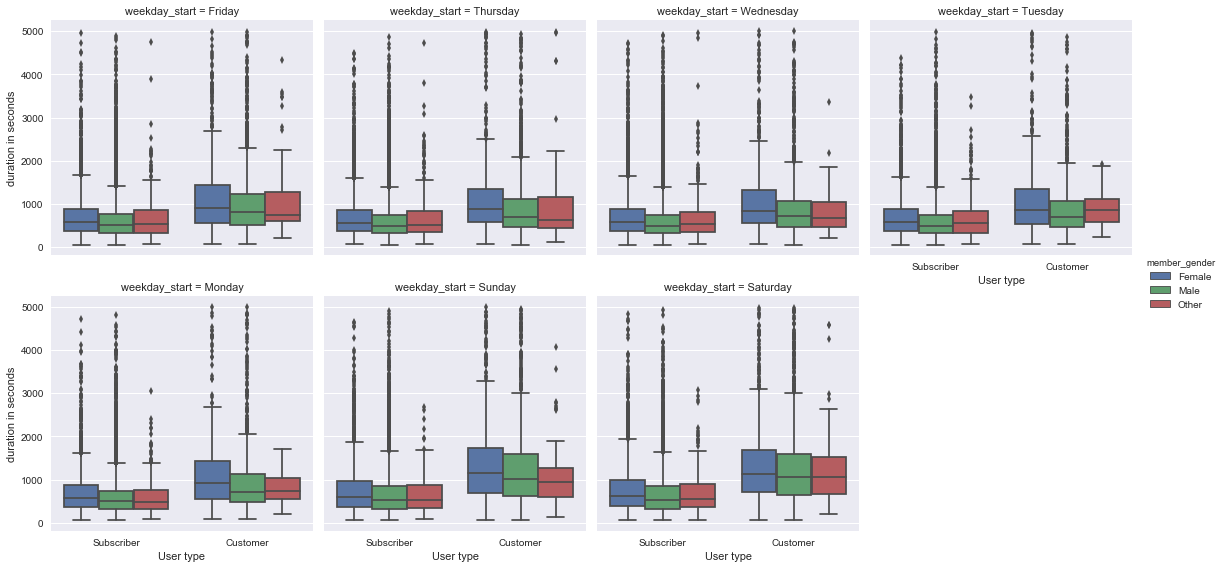

In [156]:
g = sb.factorplot(x="user_type", y="duration_sec",col = 'weekday_start',hue="member_gender",col_wrap=4, kind="box",
                  data=df.query('duration_sec < 5000'))
g.set_xlabels('User type')
g.set_ylabels('duration in seconds')

**In terms of the above figure** , We can see that Male customers as well as Female customers tend to have a longer duration on Saturday and Sunday. 

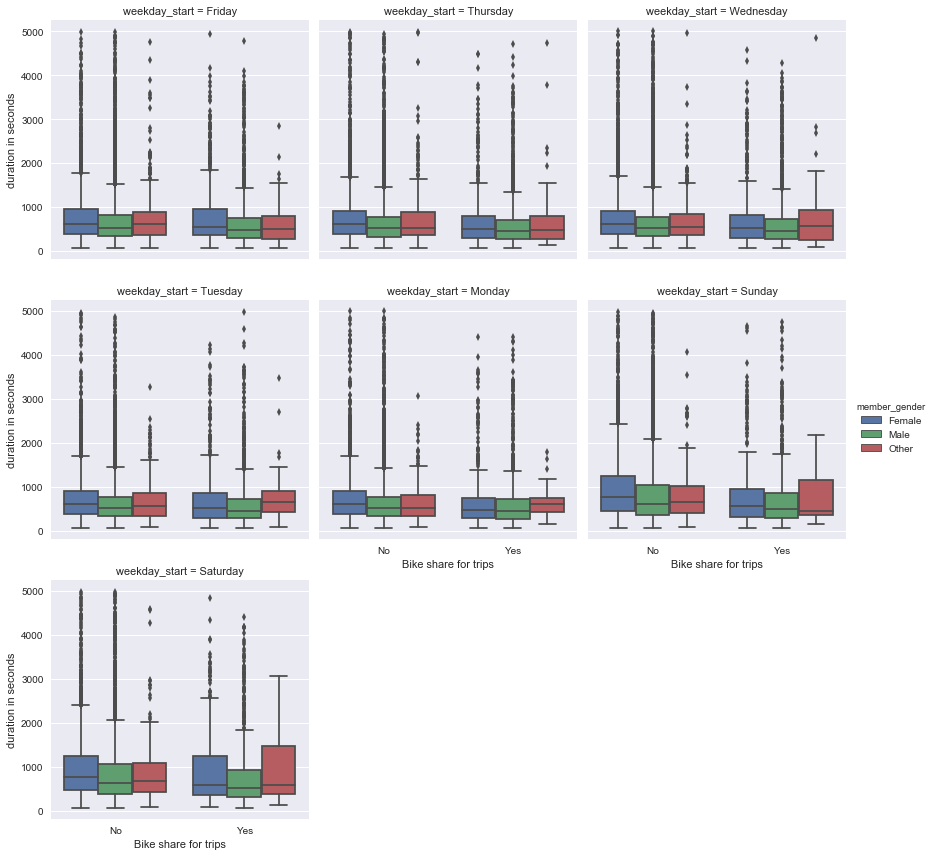

In [154]:
g = sb.factorplot(y="duration_sec",col = 'weekday_start',col_wrap= 3 ,x = 'bike_share_for_all_trip' ,hue="member_gender", kind="box",
                  data=df.query('duration_sec < 5000'))
g.set_xlabels('Bike share for trips')
g.set_ylabels('duration in seconds')

We can even take a look at the duration in seconds in terms of age

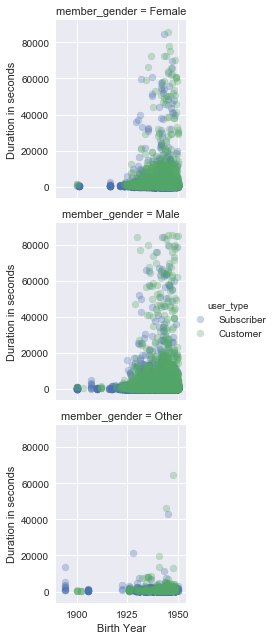

In [155]:
g = sb.FacetGrid(data=df ,row = 'member_gender' , hue = 'user_type')
g.map(plt.scatter , 'member_birth_year','duration_sec' , alpha = 0.3).add_legend()
g.set_xlabels('Birth Year')
g.set_ylabels('Duration in seconds')
g.set_xticklabels()

As we can see that Male and Female riders whether they are subscriber or customer tend to have a similar duration and age

In [138]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday_start,weekday_end
31,286,2018-08-31 23:53:06.728,2018-08-31 23:57:52.931,109.0,17th St at Valencia St,37.763316,-122.421904,356.0,Valencia St at Clinton Park,37.769188,-122.422285,1190,Subscriber,1985.0,Female,No,Friday,Friday
32,269,2018-08-31 23:49:04.040,2018-08-31 23:53:33.355,243.0,Bancroft Way at College Ave,37.869360,-122.254337,266.0,Parker St at Fulton St,37.862464,-122.264791,1026,Subscriber,1997.0,Male,No,Friday,Friday
33,3161,2018-08-31 22:59:04.364,2018-08-31 23:51:45.935,122.0,19th St at Mission St,37.760299,-122.418892,356.0,Valencia St at Clinton Park,37.769188,-122.422285,4447,Subscriber,1963.0,Male,Yes,Friday,Friday
34,551,2018-08-31 23:42:29.445,2018-08-31 23:51:41.292,88.0,11th St at Bryant St,37.770030,-122.411726,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,610,Subscriber,1983.0,Male,No,Friday,Friday
35,652,2018-08-31 23:38:58.559,2018-08-31 23:49:50.947,13.0,Commercial St at Montgomery St,37.794231,-122.402923,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,3227,Subscriber,1994.0,Male,No,Friday,Friday


**People with Bikeshare , Tend to spend more on duration. The trend on Saturday and Sunday can be a good start. The trend in female for Bikeshare for Saturday and Sunday amongst female seem to be for more duration than Male counterpart**

Finally I am going to conclude this report as follows :- 
    1. Subscribers tend to be more regular , Weekday seems to be perfect though the duration is lower as compared to Saturday and Sunday 
    2. There are more amount of Male subscriber , though Female subscribers tend to show similar trend as compared to Male counter-part 
    3. Bike sharers tend to spend more duration as comapred to Non sharers. Though the data is undistributed we cannot actually determine it as a fact. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I felt that year of birth was super interesting in terms of advertising and marketing. We can particularly target people of age around 30 since they tend to spend more time which in turn leads to more profitablity. 
We also noticed that Female customers spend more time on Weekday as compared to men. 

### Were there any interesting or surprising interactions between features?

> The interaction between weekday , gender and user type had a surprising interaction. We came to know women spend more time as a customer as compared to subscribers